# TP noté 

Rappels des conseils donnés avant le TP:


- avant de terminer, faire `Kernel > Restart & Run All`. Si lorsque nous corrigeons, le code plante parce qu'il ne doit pas etre exécuté dans l'ordre ou il apparait, nous considérerons le code comme défaillant.
- **renommez le fichier de rendu en y insérant vos nom et prénoms**, et inscrivez aussi vos nom et prénoms dans le fichier (une case sera prévue).
- **enregistrez fréquemment** (ctrl+S), quitte a faire des copies .
- prenez les questions dans l'ordre qui vous convient le mieux. Il y aura plusieurs partie indépendantes.
- lisez bien les questions. Ce sera assez guidé, mais il faut bien comprendre l'objectif de chaque question.
- si le code met trop de temps à s'exécuter, ce n'est pas normal: interrompez l'exécution.
- **à la fin, faites `Kernel > Restart & Run All`, enregistrez votre travail et déconnectez vous, nous récupérerons vos travaux automatiquement.**
    

# Plan:

- Partie 1: calculs de gradients (2 points)
- Partie 2: descente de gradient  (10 points)
- Partie 3: Optimisation de 1 hyper-paramètre (7 points)
- Partie 4: erreur dans un code  (2 points) 

ce qui fait 21 points, ce sera tronqué à 20.

## NOM: CORRECTION

## Prénom: du Prof



In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns  ## désolé, c'était indisponible mais heureusement inutile #
import sklearn

import sklearn.datasets
import sklearn.model_selection
import sklearn.svm
import sklearn.decomposition

import matplotlib.image as mpimg

-------

# Partie 1: calculs de gradients (2 points)

### Question 1.1: (1.5 point)

Soit $J_1(\vec w)= w_0 + x_0 + w_1 x_1 + w_2^2 x_2 + w_3 w_4 x_3^2 - w_4 x_4$.

Calculez $\nabla_{\vec w} J_1({\vec w})$ en fonction de $\vec w$ et des constantes $(x_0, x_1,x_2,x_3,x_4)$.

In [2]:
def J1(w,x) :
    return w[0]+ x[0]+ w[1]*x[1] + w[2]**2*x[2] + w[3]*w[4]*x[3]**2 - w[4]*x[4]

In [3]:
## aide: pour définir le vecteur (-2,1,4) on peut écrire: np.array([-2, 1, 4])

In [4]:
np.array([-2, 1, 4])

array([-2,  1,  4])

In [5]:
def gradient_de_J1(w,x):
    return ## TODO

#### Solution:

le gradient de $J_1$ est:
$J_1(\vec w)= (1, x_1, 2 w_2 x_2, w_4 x_3^2 , w_3 x_3^2  - x_4)$.

In [6]:
def gradient_de_J1(w,x):
    return np.array([1, x[1], 2*w[2]*x[2] , w[4]*x[3]**2, w[3]*x[3]**2 - x[4]]) ## TODO 

In [7]:
## pour faciliter la correction:
np.random. seed(3)
x = np.random.random(5)  
## REMARQUE: on peut mettre qqchose de moins trivial dans la vraie correction , pour éviter d'avoir des réponses justes par hasard..
w = np.random.random(5)
gradient_de_J1(w,x)


array([ 1.        ,  0.70814782,  0.12057587,  0.11502706, -0.87951685])


### Question 1.2: (0.5 point)

Soit $J_2(\vec w)= \vec w \cdot \vec x$  (produit scalaire de $\vec w$ et $\vec x$)

Calculez $\nabla_{\vec w} J_2({\vec w})$ en fonction de $\vec w$ et de $\vec x$.


In [8]:
def gradient_de_J2(w,x):
    return x ## TODO

In [9]:
gradient_de_J2(w,x)

array([0.5507979 , 0.70814782, 0.29090474, 0.51082761, 0.89294695])

-------

# Partie 2: descente de gradient  (total: 10 points)

### Question 2.1: définition du modèle (1 point, très facile)

On va chercher à faire une régression linéaire: $f_{\vec w}(\vec x_n) = \vec w \cdot \vec x_n$

Compléter la fonction suivante, qui calcule la sortie du modèle, c.a.d. qui calcule $f_w(x_n)$:

In [10]:
def fw(w,x):
    ## remarque : votre code doit fonctionner quel que soit la dimension de w.
    return x@w  ## TODO

In [11]:
## vérification: vous pouvez vérifier que votre code est (probablement) juste en executant:
np.random.seed(3)
N=100
D=5
x = np.arange(5)  + 1 
w = np.random.random(5)
print("le resultat devrait etre:",  9.347852957078544, " et il est de : ", fw(w,x))

le resultat devrait etre: 9.347852957078544  et il est de :  9.347852957078544


### Question 2.2: calcul du gradient (2 points)

On se donne une fonction cout J qui ressemble à celle de la moyenne des carrés des erreurs (Mean Squared Error), mais ici on met à la puissance 4 au lieu de la puissance 2, c'est donc l'erreur quartique moyenne (au lieu de quadratique)

$$ J(\vec w, X, Y) = \frac{1}{4N} \sum_n (f_w(x_n) -y_n)^4 $$ 

Pour ne pas vous bloquer (et parce que ça a été fait en TD), on vous donne le gradient de J:

$$ \vec \nabla_{\vec w} J( \vec w, X, Y) =  \frac{1}{N} \sum_n (f_w(x_n) -y_n)^3 \vec x_n $$ 


In [12]:
np.random.seed(3)
N=100
D=5
w = np.random.random(D)
X = np.random.random((N,D))
Y = np.random.random(N)
w.shape, X.shape, Y.shape

((5,), (100, 5), (100,))


Complétez le code ci dessous afin de calculer le gradient de J:

In [13]:
def gradient_de_J(w,X,Y):
    N = X.shape[0]
    return 1/N * (fw(w,X)-Y)**3 @ X

In [14]:
gradient_de_J(w,X,Y)

array([0.97075399, 1.02562241, 0.85415861, 1.00758449, 1.08973499])

In [15]:
## vérification: vous pouvez vérifier que votre code est (probablement) juste en executant:
np.random.seed(3)
N=100
D=5
g = gradient_de_J(w,X,Y)
print("le resultat devrait etre: \n [0.97075399 1.02562241 0.85415861 1.00758449 1.08973499 ] \net il est : \n",g)


le resultat devrait etre: 
 [0.97075399 1.02562241 0.85415861 1.00758449 1.08973499 ] 
et il est : 
 [0.97075399 1.02562241 0.85415861 1.00758449 1.08973499]


### Question 2.3: initialisation de w (1 point, facultative)

Initialiser le vecteur w de sorte que:
- il soit automatiquement de la bonne dimension, notée $D$  (dimension des données $X$).
- il soit aléatoire, avec valeur moyenne des coefficients $w_0,w_1, ...$ qui soit proche de 0)

Concrètement, vous pouvez prendre la loi uniforme dans $[-\frac{1}{\sqrt{D}},\frac{1}{\sqrt{D}}]$, ou bien la loi normale centrée et de variance $\frac{1}{\sqrt{D}}$


In [16]:
# pour la loi uniforme
# ?np.random.random

In [17]:
# pour la loi normale
# ?np.random.normal  


In [18]:
def initialiser_w(D):
    return np.random.normal(0,D**-0.5, D)## TODO

In [19]:
w = initialiser_w(5)
w

array([ 0.79989897,  0.19521314,  0.04315498, -0.83337927, -0.12405178])

In [20]:
## astuce: 
# si vous bloquez à cette question, vous pouvez utiliser pour la suite:
def initialiser_w(D):
    assert(D==5)  ## la solution fournie ne marche que pour D=5...
    w = np.array([-0.06428358,  0.3724498 , -0.01102041, -0.67729874, -0.37805004])
    return w
w = initialiser_w(D)
w

array([-0.06428358,  0.3724498 , -0.01102041, -0.67729874, -0.37805004])

### Question 2.4: Descente de Gradient, sans fioritures (2 points)

Écrire une méthode fit qui implémente le coeur de l'algorithme de descente de gradient.
On suggère les hyper-paramètres suivants:
- $\eta=0.001$ pour le taux d'apprentissage: `eta=0.001`  
- pour le nombre d'iterations maximal: 100
- pour l'initialisation de $\vec w$: (cf. question précédente)

Pour le moment, on **retourne juste la valeur de $\vec w$ trouvée, on ne fait pas de suivi.**

In [21]:
eta = 0.001
ITERMAX = 100

In [22]:
def fit(X,Y, eta, ITERMAX):
    ## TODO
    D = X.shape[1]
    w = initialiser_w(D)
    for i in range(ITERMAX):
        w -= eta*gradient_de_J(w,X,Y)
    return w

In [23]:
np.random.seed(3)
w = fit(X,Y, eta, ITERMAX)
w

array([-0.02045017,  0.41011283,  0.03215555, -0.62231519, -0.3299253 ])

In [24]:
## vérification: vous pouvez vérifier que votre code est (probablement) juste en executant:
## il faudra prendre comme w initial, 
## w_initial = np.array([-0.06428358,  0.3724498 , -0.01102041, -0.67729874, -0.37805004])  
## pour que la vérification marche
w_initial = np.array([-0.06428358,  0.3724498 , -0.01102041, -0.67729874, -0.37805004])

np.random.seed(3)
w = fit(X,Y, eta, ITERMAX)
print("le resultat devrait etre: \n [-0.02045017  0.41011283  0.03215555 -0.62231519 -0.3299253 ] \net il est : \n", w)


le resultat devrait etre: 
 [-0.02045017  0.41011283  0.03215555 -0.62231519 -0.3299253 ] 
et il est : 
 [-0.02045017  0.41011283  0.03215555 -0.62231519 -0.3299253 ]


### Question 2.5: Descente de Gradient, décorée (3 points)

Reprendre ci-dessous votre fonction de fit, en y ajoutant du suivi:
- calculer à chaque itération de la descente de gradient, la valeur de $J(\vec w)$
- calculer aussi la norme du déplacement dans l'espace des paramètres, $\eta ||\vec \nabla_w J(\vec w)||$. Aide: pour calculer la norme d'un vecteur, on peut utiliser `np.linalg.norm`
- conserver ces valeurs dans des tableaux (`np.array`)
- afficher l'évolution de ces valeurs avec `plt.plot`  (le code est fourni)

In [25]:
eta = 0.001
ITERMAX = 1000

In [26]:
def valeur_de_J(w,X,Y):
    N = X.shape[0]
    return 1/(4*N) * ((fw(w,X)-Y)**4).sum()
valeur_de_J(w,X,Y)

0.20084581754838884

In [27]:
def fit2(X,Y, eta, ITERMAX):
    ## TODO
    D = X.shape[1]
    w = initialiser_w(D)
    valeurs_de_J = np.zeros(ITERMAX)
    deplacements_de_J = np.zeros(ITERMAX)
    for i in range(ITERMAX):
        delta = eta*gradient_de_J(w,X,Y)
        w -= delta
        valeurs_de_J[i] = valeur_de_J(w,X,Y)
        deplacements_de_J[i] = np.linalg.norm(delta)
    return w, valeurs_de_J , deplacements_de_J

In [28]:
np.random.seed(3)
w, valeurs_de_J , deplacements_de_J = fit2(X,Y, eta, ITERMAX)

#### Une fois que votre code fonctionne, faites le tourner avec eta plus grand et bcp bcp plus d'itérations:

In [29]:
eta = 0.01
ITERMAX = 30000
np.random.seed(3)
w, valeurs_de_J , deplacements_de_J = fit2(X,Y, eta, ITERMAX)

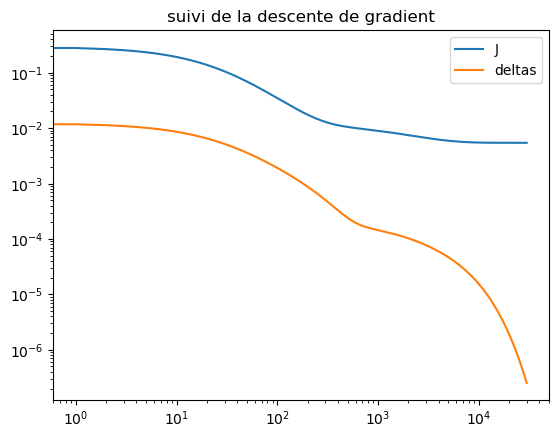

In [30]:
plt.plot(valeurs_de_J, label= 'J')
plt.plot(deplacements_de_J, label= 'deltas')
plt.loglog()
plt.legend()
plt.title("suivi de la descente de gradient")
plt.savefig("question2-5.png")

### Question 2.6: Descente de Gradient, décorée: interprétation (1 points)

On vous fourni le graphe que vous devriez obtenir (a peu près: si vous n'avez pas exactement la meme chose, votre réponse précédente n'est pas pour autant fausse !)


(-0.5, 639.5, 479.5, -0.5)

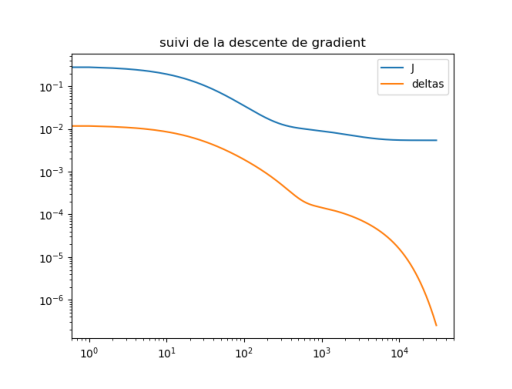

In [31]:
plt.imshow(mpimg.imread('question2-5.png'))
plt.axis('off')

Interprétation (double-cliquez pour éditer cette case de texte)


- que se passe-t-il jusqu'à l'itération ~200 - 500 ?

**Votre réponse:**

**L'algorithme de descente de gradient suit une pente assez forte, les variations des poids (les deltas) sont grands**



- que se passe-t-il après l'itération ~500 - 1000 ?

**Votre réponse:**



**L'algorithme de descente de gradient a pratiquement convergé, il n'y a plus tellement de variation de valeurs à faire, donc les deltas deviennent très petits, et J est pratiquement constant**




-------

# Partie 3: Optimisation de 1 hyper-paramètre (7 points)

Ici on va optimiser un hyper-paramètre. On sera amené à utiliser:
- `sklearn.model_selection.train_test_split`
- `sklearn.svm.LinearSVC`
- `sklearn.model_selection.cross_validate`

Il pourra être utile de consulter le code présenté en cours magistral, `2022-54-exemple-RegLin-CM--Optimization1Hyper-param-simple-remplie.ipynb`

On commence par vous donner qq éléments:
- on charge les données
- on fait un partage train+validation (80%) / test (20%)
- on présente un exemple de fit du modèle qui sera utilisé, à savoir, un classifieur SVM linéaire (sans noyau),  `sklearn.svm.LinearSVC`, dont l'hyper-paramètre à ajuster sera `C`

In [32]:
X,Y = sklearn.datasets.load_digits(n_class=10, return_X_y=True)
X_trainval, X_test, Y_trainval, Y_test\
  = sklearn.model_selection.train_test_split(X, Y, \
                                             test_size=0.2, \
                                             random_state=7)

In [33]:
## exemple pour C = 1
C=1
monModele = sklearn.svm.LinearSVC(C=C, max_iter=1000, dual = False)
monModele.fit(X_trainval, Y_trainval)
monModele.score(X_trainval, Y_trainval)

0.9986082115518441


## Question 3.1 : optimisation de `C`  (3 points)

- Faites varier `C` de façon géométrique (par exemple de $10^{-6}$ à $10^2$, par un facteur 10 à chaque fois), et pour chaque valeur de `C`, faites une validation croisée (Cross-Validation) à 5 plis.
- Stockez les résultats dans des tableaux `trainScore`, `validScore`

Pensez à utiliser  `sklearn.model_selection.cross_validate`


In [34]:
?sklearn.model_selection.cross_validate

In [35]:
?np.logspace

In [36]:
plage_de_valeurs_pour_C = np.logspace(-6,2, num=9)## attention, les valeurs dans les arguments de np.logspace sont à modifier !!
nombreDePlisDeCV = 5
trainScore = np.zeros((plage_de_valeurs_pour_C.shape[0], nombreDePlisDeCV))
validScore = np.zeros((plage_de_valeurs_pour_C.shape[0], nombreDePlisDeCV))
for i, C in enumerate(plage_de_valeurs_pour_C):
    monModele = sklearn.svm.LinearSVC(C=C,max_iter=1000, dual = False)
    myCV = sklearn.model_selection.cross_validate(monModele, \
                X_trainval, Y_trainval, \
                cv = nombreDePlisDeCV, return_train_score=True)
    trainScore[i] = myCV['train_score']
    validScore[i] = myCV['test_score']

/home/flandes/local_installs/mambaforge/envs/sandbox/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


- affichez le résultat sous forme graphique, en utilisant le modèle ci dessous, et à l'aide de la fonction 
`plt.errorbar`

In [37]:
?plt.errorbar

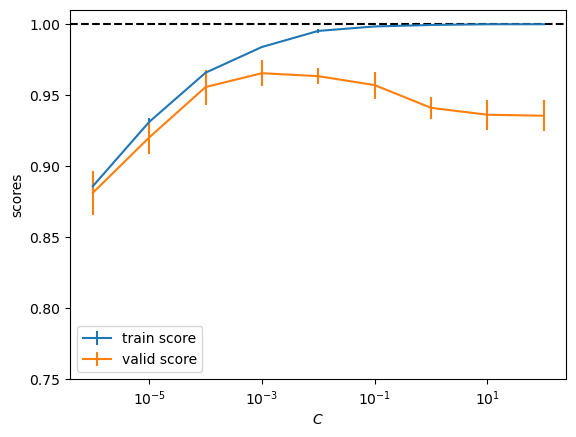

In [38]:
## plot des scores en fonction de l'hyper-param. nc
## c'est cadeau (rien à faire ici)
plt.figure() 
plt.errorbar(plage_de_valeurs_pour_C, np.mean(trainScore,axis=1)   , label= "train score",yerr=np.std(trainScore,axis=1))
plt.errorbar(plage_de_valeurs_pour_C, np.mean(validScore,axis=1)   , label= "valid score",yerr=np.std(validScore,axis=1))
plt.xlabel(r"$C$")
plt.ylabel("scores")
plt.legend()
plt.ylim([0.75,1.01])
plt.axhline(1, c='k', ls='--')
plt.semilogx()
plt.savefig("question3-1.png")

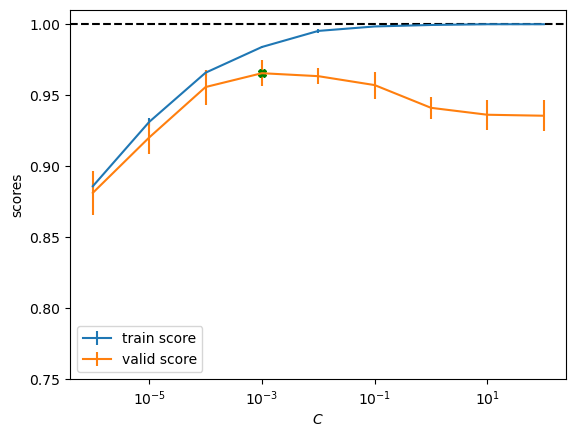

In [39]:
## plot des scores en fonction de l'hyper-param. nc
## c'est cadeau (rien à faire ici)
plt.figure() 
plt.errorbar(plage_de_valeurs_pour_C, np.mean(trainScore,axis=1)   , label= "train score",yerr=np.std(trainScore,axis=1))
plt.errorbar(plage_de_valeurs_pour_C, np.mean(validScore,axis=1)   , label= "valid score",yerr=np.std(validScore,axis=1))
plt.xlabel(r"$C$")
plt.ylabel("scores")
plt.legend()
plt.ylim([0.75,1.01])
plt.axhline(1, c='k', ls='--')
plt.semilogx()

## affichage du meilleur point (ensemble de validation)
## ici on fait un choix primaire, sans tenir compte de l'overfitting, etc:
## il peut etre affiné a la main
linear_valid_score = np.mean(validScore,axis=1)
bestIndex = np.argmax( linear_valid_score )
bestNC = plage_de_valeurs_pour_C[bestIndex ]
plt.plot(bestNC, linear_valid_score[bestIndex], marker='X', color='green')

(-0.5, 639.5, 479.5, -0.5)

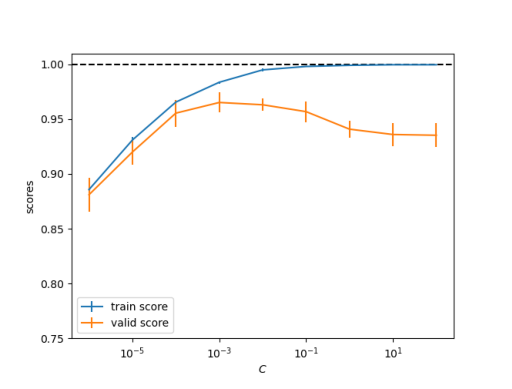

In [40]:
## au cas ou vous auriez bloqué avant, on vous fourni une réponse possible à la question précédente:
plt.imshow(mpimg.imread('question3-1.png'))
plt.axis('off')


(double-cliquez pour éditer cette case de texte)

- quelle est la meilleure valeur à prendre pour `C` ? Pourquoi ?

**Votre réponse:**

**$10^{-3}$ et $10^{-2}$ sont acceptables: meilleure validation score pour le premier, et pour le second, tres bon validation score mais avec moins de variance.**


- en lisant un peu la doc de la librairie, de quoi `C` est il l'analogue ? Comment peut on interpréter la courbe d'entrainement? 

**Votre réponse:**


*C est l'analogue d'une **régularisation** , ou autrement dit, **controle la complexité du modèle**. (il faut faire apparaitre l'un au moins de ces 2 mots clefs).*

**Le train score augmente de façon monotone lorsqu'on diminue le taux de régularisation.**

**le validation score, lui, a un optimum.**




### Question 3.3: prédiction: (3 points)
- au vu du résultat de la question 3.1 et de votre choix fait en 3.2, quelle est la valeur (ou plage de valeurs) attendue pour le score de test ?  (0.5 point)

(double-cliquez pour éditer cette case de texte)


**Votre réponse:**

**on s'attend à ce que le score de test soit compris dans la barre d'incertitude affichée dans le plot précédent**



In [41]:
C_choisi = 10**-3

In [42]:
validScore[plage_de_valeurs_pour_C==C_choisi]

array([[0.96875   , 0.96180556, 0.97909408, 0.95121951, 0.96515679]])

In [43]:
## intervalle attendu: proposition 1: en prenant le min et le max
validScore[plage_de_valeurs_pour_C==C_choisi].min(), validScore[plage_de_valeurs_pour_C==C_choisi].max()

(0.9512195121951219, 0.9790940766550522)

In [44]:
## intervalle attendu: proposition 2: en prenant l'écart type
(np.mean(validScore,axis=1) - np.std(validScore,axis=1))[plage_de_valeurs_pour_C==C_choisi], \
(np.mean(validScore,axis=1) + np.std(validScore,axis=1))[plage_de_valeurs_pour_C==C_choisi]


(array([0.95612085]), array([0.97428952]))

-------------------

- en utilisant autant de données qu'il est permis, entrainez le modèle pour la meilleure valeur de `C` possible, puis calculez le score de test.    (2 points)

In [45]:
# en utilisant autant de données qu'il est permis, 
# entrainez le modèle pour la meilleure valeur de `C` possible, 
# puis calculez le score de test.  

## TODO
C=C_choisi
monModele = sklearn.svm.LinearSVC(C=C, max_iter=1000, dual = False)
monModele.fit(X_trainval, Y_trainval)
monModele.score(X_trainval, Y_trainval),  monModele.score(X_test, Y_test)

(0.9832985386221295, 0.95)



- La valeur trouvée est elle conforme à vos attentes (par rapport à la figure faite en question 3.1) ?   (0.5 point)

(double-cliquez pour éditer cette case de texte)


**Votre réponse:**

**Avec 0.95, On est très légèrement en dessous de l'intervalle attendu, mais bon, on avait fait que 5 splits, donc en gros c'est dans la plage de valeurs attendues (la mesure donnée par le min et max sur 5 points n'est pas parfaite de toute façon). 
Donc oui, la CV a permis d'estimer la valeur que pourrait avoir le score de test**

-------

# Partie 4: erreur dans un code  (2 points) 


In [46]:
## ce code là est valide, on charge simplement les données:
X,Y = sklearn.datasets.load_digits(n_class=10, return_X_y=True)
X /= X.max()  # on met X (les intensités de niveaux de gris) entre 0 et 1
X_train, X_valid, Y_train, Y_valid = sklearn.model_selection.train_test_split(X, Y, \
                                             test_size=0.2, \
                                             random_state=7)

Voici un code qui comporte une erreur (conceptuelle). Quelle est elle ? 

In [47]:
## l'erreur est à chercher dans ce bloc:
preProc = sklearn.decomposition.PCA(n_components=10)
preProc.fit(X_train)
X_Transformed = preProc.transform(X)
X_train_Transformed = preProc.transform(X_train)
X_valid_Transformed = preProc.transform(X_valid)

## on fit le modèle sur les données transformées 
## et on évalue les performances
clf = sklearn.svm.SVC(C=1, kernel='poly' , degree=3)
clf.fit(X_Transformed, Y)
trainscore = clf.score(X_train_Transformed, Y_train)
validscore = clf.score(X_valid_Transformed, Y_valid)
print("train score=", trainscore)
print("valid score=", validscore)

train score= 0.9846903270702854
valid score= 0.9861111111111112


- Proposez une correction (1.5 points)

**Il faut entrainer le modèle sur X_train_Transformed, par sur X_Transformed:**

In [48]:
## copiez-collez le code à corriger ici, et corrigez le

In [49]:
## l'erreur est à chercher dans ce bloc:
preProc = sklearn.decomposition.PCA(n_components=10)
preProc.fit(X_train)
X_Transformed = preProc.transform(X)
X_train_Transformed = preProc.transform(X_train)
X_valid_Transformed = preProc.transform(X_valid)

## on fit le modèle sur les données transformées 
## et on évalue les performances
clf = sklearn.svm.SVC(C=1, kernel='poly' , degree=3)
clf.fit(X_train_Transformed, Y_train)
trainscore = clf.score(X_train_Transformed, Y_train)
validscore = clf.score(X_valid_Transformed, Y_valid)
print("train score=", trainscore)
print("valid score=", validscore)

train score= 0.9832985386221295
valid score= 0.9555555555555556


- Expliquez le changement de performance (0.5 point)

**L'erreur était que on entrainait sur toutes les données (train+val) donc il n'y avait en fait pas de validation set. Donc la performance de "validation" était la meme qu'en train. Avec un split, comme attendu, la perf en validation est légèrement moins bonne**